In [1]:
import numpy as np
import re
from unidecode import unidecode
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data isnt ordered.it is so mixed
data = ["İnsan yaş aldıkça tembel gezileri daha çok seviyor. Tembelden kastım, koşturmadan, gün aşırı bavul toplamadan, fazla yorulmadan yapılan geziler. Bunların başında gemi turları geliyor benim için. 'Aheste çek küreği, mehtap uyanmasın' cinsinden yani! Oku, yaz, ye, iç... Limanlarda bir kahvede oturup, geleni geçeni seyret. Bu güne kadar Karayip Denizi'nde ve Akdeniz'de bir kaç sefer yaptım bu şehir benzeri gemilerle… Son gezimi ise İtalyan gemisi Costa Favolosa ile biraz Baltık Denizi'nde, biraz da Norveç'in cenneti andıran güney fiyortlarında yaptım.Deniz yolculuğu, denizi olmayan Berlin'den başladı. Yolculuğa ısınmak için iyi bir başlangıçtı bu. Yıllardan beri gide gele epey haşır neşir oldum bu kentle. Köşe bucak öğrendim. Öğle yemeği için soluğu kentin en büyük alış veriş merkezi KDV'de aldım. Bu mağazanın 6. katı midesine düşkün olanların malumudur. Lezzet adına ne ararsan bulursun. Hakkımı Japon mutfağından yana kullandım.Akşam yemeği için ise Luther Und Wegner' lokantasına gittim. Kentin en eskilerinden biridir bu lokanta. Mönüsü geleneksel Alman yemeklerinden oluşuyor. Burada tavada kızartılan şinitzelin tadına doyum olmaz. Yine aynısından ısmarladım. Eti incecikti ve dış kaplaması çok özel baharat karışımından yapılmıştı. Bu kez burnuma biraz karanfil kokusu çaldı. Berlin güneşini esirgemedi bizden, yeşil ağaçlarının gölgesini cömertçe sundu.Ertesi gün otobüsle, yeşil tarlaların, ormanların, uzaktaki dağların arasından geçip, Lübeck kentine geldik. Su ile çevrili bu kent, ilk görüşte sevdirdi kendisini. Daracık sokaklar, neredeyse tüm mimari tarzlarıyla süslenmişti. Kimi yapı Barok', kimisi Gotik', Rönesans', kimisi de klasik mimarinin tüm özelliklerini yansıtıyordu. 100 yıllık bir geçmişi olan bu güzel kenti Unesco, Dünya Mirası Listesi'ne almıştı.Lübeck'te iki adımda bir dönerciye rastladım. Meğerse 4 binden fazla Türk yaşıyormuş burada. Uğradığımız ikinci kent Rostock oldu. Küçük ve eski bir kentti. Doğu Alman rejiminin sıkıntılı yüzü hala hissediliyordu. Komünist yönetimden kalma sosyal konutlar, her ne kadar rengârenk boyanmışlarsa da, alttaki grilik ve can sıkıcılık kendini belli ediyordu.1419'da kurulan Rostock Üniversitesi, ay farkı ile Avrupa'nın en eski üniversitesi olma unvanını Bolonya Üniversitesi'ne kaptırmıştı. 700 yıllık üniversitenin bahçesinde otururken, buradan mezun olup, dünyayı şekillendiren bilim adamlarını hayal etmeye çalıştım.Kentte en ilgimi çeken şey, St. Mary kilisesindeki astrolojik saat oldu. Saat 1641 yılından beri çalışıyordu. O günden beri gökyüzündeki burçları, yıldızları, gezegenleri gösteren şaşırtıcı saatin karşısından uzun süre ayrılamadım.İki günlük kara yolculuğundan sonra Warnemünde limanında, bizi kuzeye götürecek gemimize kavuştuk. Gemi dediğim, orta ölçekli bir kasabayı barındıracak kadar büyük bir gemiydi. Sonradan 11 katlı olduğunu öğrendim. Barlar, dans pistleri, dükkânlar, lokantalar, açık kapalı havuzlar, kütüphane, tiyatro ve sinema salonu, pastahane, geminin çeşitli katlarına serpiştirilmişti. Kumarhanedeki makineler ise avucu kaşınanların vazgeçemediği durakların başında geliyordu.Özetlersek, gemi gemi değil, heybetli bir eğlence merkeziydi. Yemeklerin çok lezzetli olduğunu söyleyemeyeceğim. Ama yine de en lezzetli ve değişik soslu makarnaları beğendiğimi belirtmeliyim.  Gemide yemek miktarına çok dikkat etmek gerektiği aklınızın bir kenarında bulunsun. İnsan istemeyerek ölçüyü kaçırabiliyor. Eğer yolculuk sonunda kilo sorunuyla boğuşmak istemiyorsanız, gemide bol bol yürümenizi, arada bir spor salonunda ter dökmenizi öneririm. Costa Favolosa, genellikle gece sefere çıkıyor, sabah ise limana yanaşıyordu. Yani şöyle doya doya denizi seyretme olanağını bulamıyordunuz.İlk yanaştığımız liman, Danimarka'nın ikinci büyük kenti Aarhus oldu. Vikingler tarafından kurulmuş olan küçük kentte, bu savaşçı ırktan geriye pek bir şey kalmamış. Aarhus, yürüyerek keşfedilebilecek bir kent. Eğer bir bakışta kentin tümünü görmek isterseniz, Sanat Müzesi'nin 10. Katına çıkmanızı öneririm. Bir başka önerim de bira düşkünleri için olacak. Hantwerk' adlı bar, kendi yapımı olan biralarla damakları çatlatıyor. Bir de dünyanın en güzel garsonlarının bu kentin barlarında çalıştığını belirtmeliyim.Güneş çok geç battığı için, dantel kıyıların güzelliğini doya doya seyretmek mümkün oluyor. Yeşillin tüm tonlarını barındıran bu fiyortlar, cennetin tarifine tıpatıp uyuyor. Dağların zirvelerindeki karların suyundan oluşan şelaleler, köpük köpük suları ve şırıl şırıl sesleriyle görüntüye güzellik katıyorlardı. Her fiyortta, 5-10 evden oluşan bir köy görüntüye giriyordu. Rengârenk boyanmış evler, rüyalarımı süsleyen evlerle tıpatıp uyuşuyordu. Fiyortlarda yanımızdan gelip geçen küçük vapurlar, bu şirin köyler arasında yolcu, mektup ve arabaları taşıyorlardı. Bu vapurların geliş gidiş saatlerinde sessiz köylere bir hareketlilik geliyordu.Dünyanın çirkinliklerinden uzakta, doğayla kucak kucak yaşayan bu insanların yerinde olmak isterdim! Vahşi doğanın kucağındaki Haugesund kenti, Briksdal Buzulunun süslediği Olden, Norveç'in en büyük fiyortlarından biri olan Geiranger derken Bergen'de gemi yolculuğuna noktayı koydum. Bergen Norveç'in en eski ve en güzel kentlerinden biri.  Yedi dağlı, beş parmaklı bu kenti kuş bakışı görmek isteyenlere flobanen teleferiği ile 7 dakikalık bir yolculuk yapmanızı öneririm. Çıktığınız tepeden tüm kenti görmeniz mümkün. Sivri çatılı tarihi ahşap Bergen evleri de görülmesi gereken adreslerden biri. Daha önce bu kente köşe bucak dolaştığım için bu sefer deniz kıyısındaki bir kahveye oturup, geleni geçeni ve batmamakta direnin güneşi seyrettim. Bilseniz aklımdan ne düşünceler geçti, ne hayaller kurdum. Bergen'den Oslo'ya kara yolundan gittim. Uzun, virajlı, yemyeşil, çok güzel bir yoldu. Yalnız evler, yazlık köyler, karlı zirveler, yemyeşil ormanlar... Tüm bu güzellikleri paylaşan 5,5 milyon Norveçli'yi teker teker kıskandım. Yaz sıcağında, kuzeye yapılan gemi yolculuğunun, tatillerin en güzeli olduğuna karar verdim.Bu seyahat, Prontotour sponsorluğunda yapılmıştır.Norveç yerel hava yolları ile (SAS) Bergen'den Oslo'ya uçtuk.Otelimiz Oslo'da havalimanı oteliydi.Bugünü dinlenmeye ayırmaya karar vermiştik.Aslında bugün ile ilgili size anlatacak çok bir şey yok.Oslo havalimanı radisson Otelinde kaldık.Gece güzel bir açık büfe akşam yemeği alıp yemekten sonra odamızda ıped den Süt Kardeşleri seyrettik.film biter bitmez de uyuduk.Derin bir uykuya dalmıştı taa ki gece saat 12 de otelin yangın alarmı çalana kadar.Nasıl kalktığımızı ve kendimizi otelin yangın merdivenine nasıl attığımızı anlatmak şu an kolay ve hatta eğlenceli.ama o an itibari ile otelde yaşadıklarımız resmen can pazarı gibiydi.Herkes odalarından gecelik,terlik ve donla çıkmıştı.Donla çıkan örnek bizzat kocamdı hatta..Bir taraftan burnuma duman kokusu geliyormuş gibi hissediyordum.Yukarıdan merdivenlerin alt katlarına bakarken bir baktım bir kısım insan geri yukarı çıkıyor.O an uyku sersemi insanın aklı tam çalışmıyor.ben de aşağıda duman çok inemediler ve bu yüzden tekrar yukarı geliyorlar diye düşündüm.oysa otel yanlış alarm çalmış aşağı ilk inenlerde bunu öğrenmişler ve yukarı çıkıyorlarmış.Otel maceramız tam bir fiyaskoydu..Bergen'de Floyen tepesinden indiğimizde keşfettiğimiz kafeye hergün ugradık demiştim ya bunun en önemli sebebi tezgahta hergün farklı bir lezzet durması.ilk gün harika bir elmalı tart vardı.yanında dondurma ile servis ettikleri bu tartı yerken bol köpüklü cafe latte eşlik etti.Lattenin üzerindeki kalın süt köpüğü ile kalpler yapmışlardı.Son günümüzde hediyelik eşya satan mağazalarda daha fazla vakit geçirdik.bergen'de ana tema geyik..ayrıca balık pazarında çok güzel geyik derileri,seramikler,magnetler de var.bugün ,gitmeden önce fiyordlar arasında biraz daha vakit geçirmek amacı ile sahilden kalkan ve bir kaç saatlik gezinti yaptıran teknelerden tur satın aldık.Kişi başı 500 NOK tutarında bu gezilerde gidilen yer tabiki gelirken gördüğümüz büyük fiyordlar değil.Doğa harikası olanlar çok daha dışarıda kalıyor.Ama bu gördüklerimiz de hem norveç'i hem bergen'in çevresini daha fazla tanımamız adına işe yaradı.dönüşte çocuklardan gelen yoğun istek üzerine yine floyen tepesine çıktık.Son gecemiz olduğu için İstanbul'a gitmeden almak istediğimiz ne varsa aldık.Çocuklar Mc Donalds biz balık pazarı olarak akşam yemeğimizi yedik.günün kalan kısmında çocuklar için kurulmuş açık hava oyun parkında satranç oynadık.puzzle yaptık.kiliselerine kadar yürüyerek içini gezdik.Bu kilise Fontoft Kütük Kilisesi.Viking gemileri gibi kütükten yapılmış ve Norveç'de sadece 30 tane kalmış.Mount Ulriken denen bir başka tepeleri daha var.ama artık ona da 700 NOK vermek istemediğimiz için gitmedik.akvaryumlarını gezmeyi düşündük çocuklar onunla da pek ilgilenmeyince vazgeçtik.ertesi gün Oslo'ya gidecektik.Son gece bergen ile vedalaşıp güzel bir uyku çektik.7 Ağustos 2013,sabah güne güzel bir kahvaltı ile başladık.Norveç'te olunca kahvaltıda somon yemek gayet sıradan.Neyseki ben somonu 3 öğün yesem bıkmam.Ardından bu küçük ve şirin sahil kasabasını gezmeye koyulduk.Balık pazarında hemen hemen her çeşit taze deniz ürünü var.İnsanlar hem evlerine alışveriş yapıyorlar hem de seçip hemen orada pişirtip yiyebiliyorlar.Norveç Kronu pahallı.Balık pazarında ayak üstü fast food balık bile yeseniz 4 kişilik bir aileye bu yemeğin maliyeti 1.000 nok oluyor.Yani 300-350 tl.Bu yüzden tek öğün yemek yemeye özen gösterdik.Pepe's diye bir pizzacıları var.Mc Donald's gibi yaygın bir marka.İkinci gün burada yediğimiz pizza için bile 900 NOK ödedim.Kaldı ki 3 pizza sipariş etmiştik.FLOYEN.Bergen'in en tepe noktası.Bir bilet alarak teleferik ile bir kaç dakika içinde Floyen tepesine çıkılıyor.Zirvede güzel bir Bergen manzarası bizi karşıladı.Floyen tepesinde çocukların çok sevdiği bir park,içinde su bisikletlerinin de olduğu bir göl,güzel bir cafeteria var.Orada bayağı bir zaman geçirdikten sonra yürüyerek aşağı indik.Teleferik bileti çift yön yada tek yön olarak satılıyor.İndiğimiz yol uzun sürmekle birlikte orman yolu olduğu için tertemizdi ..Döne döne,sürekli yokuş aşağı sanırım yarım saat gibi bir sürede aşağı indik.teleferik istasyonunun hemen arka paralel sokağında,Bergen'de kaldığımız sürece her gün uğradığımız bir kafe bulduk.Otelimiz balık pazarının hemen arkasındaydı.Bütün gün kuzeye doğru yol aldığımız için gün ışıkları bir türlü azalmıyordu.Saat gece 23.00'ü gösterirken alacakaranlık bir ortam vardı.tamamen karanlık olduğunda saat gece 11'i geçmişti.O gece yemeğimizi balık pazarında yedik.Ben tütsülenmiş somon balığı yedim.Ateş kuzey denizine özgü daha önce hiç yemediğimiz beyaz etli bir balık yedi.Aslında tadı tuzu olmayan bir balıktı ama sunumu ilginçti.Üzerini komple karabiber ile bulamışlardı.Karnımızı doyurduktan sonra hemen caddenin karşısındaki otelimize geçtik.Huzur ,sakinlik,yalınlık..sanki AN donmuş.suların aktığı,alabildiğince yeşil,insanın tek tük olduğu bir cennet.İstanbul gibi bir şehrin kalabalığındna sonra huzurun adı..hayatımda yaptığım en muhteşem seyahatti.iki saate yakın Fjordların arasından salınarak geçtik.Tek tük evler gördük hatta bazılarının karayolu bağlantısı yoktu.Yada biz göremedik.bir kaç kanoya binmiş Norveç'li bir ara yanımızdan süzüldü.Dağların üzerinde keçiler otluyordu.o tek tük evlerin bacalarından dumanlar tütüyordu.Kapılarının önünde odunlar yığılıydı.Kiminin önünde minik bir iskeleye kayıkları bağlıydı kiminin ise kapısının önünde kamyonetleri duruyordu.Gudvangen'den tren istasyonuna bizi tur otobüsü götürdü.Otobüs yolculuğumuz yaklaşık 1 saat sürdü.Otobüs bizi dev bir şelalenin sularının gürlediği zirveye çıkartıp,oradan tekrar aşağı indirdi.İnip çıktığımız yol o kadar inceydiki otobüs virajları dönerken burnumuzun ucunda yolu göremiyorduk.Sanki otobüsde değil uçakda gidiyormuş hissediyorduk.Çünkü yerden hem çok yukarıda hem de yamacın dikliği nedeni ile uçurumdan aşağı bakar gibiydik.Voss'a geldiğimizde artık hem acıkmış hem de yorulmuştuk.Efe tren istasyonunda bir chicken nugget yedi.Ela uyuyordu.Voss'dan bizi Bergen'e götürecek tren ile yolculuk 1 saat sürdü akşam saat 19.00-20.00 suları Bergen'e vardık.Tren öyle bir kalabalık oldu ki oturacak yer bulamadık.İnsanlar resmen üst üste tıklım tıklım bindi.bu duruma çok da şaşırdık sonuçta itiş kakış binmemiş olsaydık satın aldığımız turun kalan kısmını tamamlayamayacakmıydık? Bir yanımızın uçurum ve bir yanımızın muhteşem bir dağ olduğu yolda terenimiz hareket etti.yeşillikler ve dik yamaçların aralarından sürekli sular fışkırıyordu.Yaklaşık 10 dakika gittikten sonra fotograf molası için durduk.Dev bir şelalenin arasından birden bir kadın çıktı.o muhteşem manzara,yağan yağmur ve şelaleden üzerimize sıçrayan suların içinde bize harika sesi ile şarkı söylemeye başladı.Bir yandan soğuk hava,yağmur,hatta sulu kar,diğer yandan şelalenin rüzgarın da etkisi ile bize gelen suları ve böyle bir ortamda sanki başka bir dünyada olduğumuz hissini veren şarkı..Nefis bir andı.Tren yaklaşık 10 dakika burada durdu.Trendeki digital ekranda hangi tünellerden geçtiğimiz ,bulunduğumuz yükseklik,istasyonların adı sıra ile yazıyordu.Ama tren bir o kadar da nostaljik ve tarihiydi.Yaklaşık yarım saat içinde Flam kasabasına geldik.Flam asında tüm turlar için merkezi bir nokta.Bir çok botun kalkış istasyonu.Hatta turistler 8-12 kişilik üstü açık teknelerle gruplar halinde kısa turlar alıyor.Bu turlarda üzerlerine yağmurlukları şirket veriyor.Turların kalkışlarını da izledik.Trendeki inanılmaz kalabalık ile birlikte bineceğimiz tekneye ilerlemeye başladık.Valiz ve bebek arabamızın olması bizim için dezavantajdı.Ama genelde diğer turistlerde eşya anlamında bize benzer durumdaydı.Vapurun içinde kapalı oturum alanları vardı.dışarıda plastik sandalyeler ile oturma alanları oluşturulmuştu.Hem ön hem arka güverte vardı ve ayrıca bir üst kattan da özellikle fotograf çekmek için faydalanılabiliyordu.Biz ilk başta ön güverteye ve tam da manzaraya dönük bir şekilde oturduk.Çocuklara yanımızdaki meyveleri yedirdik.Ama vapur hareket ettikten bir süre sonra çocuklar üşüdü.İçeride kendimize bir yer bulduk.Ve yolculuğu kah içerde kah dışarda tamamladık.Bu yolculukla ilgili şunu söylersem abartmış olmam.YERYÜZÜNDE BİR CENNET VARSA O CENNETİN ADI KESİNLİKLE NORVEÇ'TİR.Bunca yıldır bir çok yer gezdim ve  bu kadar gezdiğim yer içinde cennet diyebileceğim kadar güzel ,şu ana kadar sadece Norveç'i gördüm..6 Ağustos:Bu paketi İstanbul'dan internetten satın aldım.Gezimizin en ilginç günü bugün ve birazdan anlatacaklarım.Eger kendi başınıza Norveç seyahati planlıyorsanız kesinlikle bu turu almanızı öneririm.Hatta siteyi ziyaret ettiğinizde daha farklı alternatiflerde göreceksiniz.Ne de olsa bu ülke fjord cenneti.Oslo'dan bir trene bindik.Bu tren bizi yaklaşık 3 saatlik bir yolculuk ile Myrdal'e götürecekti.Myrdal'de inip Flam trenine geçecektik.Flam treni ile dağların tepesinden deniz seviyesine inip oradan bineceğimiz vapur ile fjordların arasından geçerek Voss'a gelecektik.Voss'da kısa bir otobüs yolculuğu ile tren istasyonuna gelerek voss'dan bineceğimiz tren ile bergen'e varış..işte günün özeti ve turun en kısa yoldan anlatımı bu..Neredeyse tam gün süren bir yolculuk.Ama Norveç seyahatinin anlamı da işte bu yolculuktu zaten..Oslo'dan Mydral'e bizi götürecek pulman koltuklu trenimiz kalktı.Trende çocuklar için oyun vagonu da düşünülmüştü.Yemyeşil ovalar ve dağların içinden geçen uzun tüneller,tek katlı ve kırmızı çatılı evler,bol ama çok bol miktarda ağaçlar,yol boyunca bizimle kovalamaca oynayan dereler arasında geçen bir yolculuktu.Tren gayet konforluydu.Çocuklar için oyun vagonunun yanısıra restorant vagonu da vardı.Çizgi film izledikleri bir tv ve içinde küçük bir labirent de olan merdivenli oyun pakı çocukları yaklaşık bir saat oyaladı.Mydral denen istasyon Oslo'nun kuzeyinde ve batı tarafında kalıyordu.Aslında daha da kuzeye çıkarak Trömso'ye kadar gitmek iyi olurdu ama çocuklarla bizim için bu bile iyi ve zorlu bir güzergah oldu.Mydral denizden 866 mt yukarıda bir yerleşim alanı.dağların içinde küçük bir tren istasyonu.Burada indiğimizde yağmur yağıyordu.O kadar fazla bir kalabalık vardı ki gelecek olan Flam trenine bunca insan nasıl binecek merakla beklemeye başladık.Flam treni ile deniz seviyesine inecektik ve deniz kenarına vardıktan sonrabizi fiyordlar arasında gezdirecek olan teneye geçecektik.The Aurlands Fjord ve The Naeroy Fjord larını gördükten sonra Gudvangen denen kasabada inerek otobüs ile Voss'a ulaşacaktık.Voss'dan tren ile Bergen.Bu tur Norway in a Nutshell'in programlarından sedece birisi.Bergen'i görüyor olmamız elbette çok güzel oldu ama bu seyahati şimdi planlıyor olsaydım Flam'da mutlaka konaklama yapar ve bir günümüzü de The Sognefjord'u görmek için ayırırdım.www.fjordtours.com  sitesinden tur detaylarına bakınız.Sabah uyanır uyanmaz  mini tuvalette sıra ile çocukların temizlik ve tuvalet işlerini bitirdik ve giyinip hemen kahvaltı salonuna çıktık.Bir de ne görelim Norveç'in ünlü fiyordlarının arasından süzülerek oslo'ya doğru yaklaşıyoruz.yeşillikler,dağlar,evler herşey bir tabloya çizilerek konmuş gibiydi.Yine harika bir kahvaltı yaptık.iner inmez bir taksiye binerek otelimize ulaştık.Şehir merkezine yakın bir yerdeydi otelimiz.valizlerimizi bıraktığımız gibi ilk gördüğümüz sightseening'e atladık.hiç bilmediğiniz  bir şehri vaktiniz de az ise gezmenin en güzel yolu bence bu otobüsler .Otobüsümüz bizi önce opera binasının önünden geçirdi.Ardından parlemento binasını gördük.Tarih müzesi ve Vigelands Park.Bu parkın özelliği yüzlerce çıplak insan heykelinin büyük bir estetik uyum içinde parkın her tarafında sergileniyor oluşu.Heykeltraş Vigaland sanatın para ile satılmayacağına inanarak ücretsiz sergilenmesi için tüm yaptığı heykelleri şehre bağışlamış.Hava güzeldi.Parkı gezdik.Hatta hava o kadar güzeldi ki çocuklar dondurma bile yedi.Hiç kimsenin bizi tanımadığı,dilimizi bilmediği,dünyada sadece dördümüz varmışcasına birbirimize ait olduğumuz o parkta kocamla ve çocuklarımızla uzun uzun sarıldık öpüştük..Otobüse binerek Norveç Folk Müzesine devam ettik.Burası Norveç halkının yaşam kültürü,yemekleri,evleri,bahçeleri,kapkacakları,giysileri gibi pek çok konuda bize fikir veren harika bir açıkhava müzesiydi.Ülkenin bulunduğu coğrafyada  iklimin çok soğuk olması nedeni ile evler küçük küçük yapılmıştı.Hatta yatak boyları bile bir insan boyunun altındaydı.Bunu merak edip internetten araştırdığımda öğrendim ki,eskiden hızlı ısınmak için o yataklara cenin pozisyonunda yatılır ve o şekilde  hızla ısınılırmış.Yine evlerin çatıları yeşil çimen kaplıydı.Toprak ve çimenin çatılarda bu şekilde kullanılma sebebi yalıtım amaçlı.Oradan Viking Müzesine devam ettik.Burası da en çok Efe'nin ilgisini çekti.İçerde 2 tane ,vikinglerden kalmış ve tahtaları yani iç iskelet tahtaları hala sağlam olan,viking gemisi vardı.Yine Vikinglerin kullandığı mutfak aletleri,giysileri ve evleri müzede sergileniyordu.Turumuzu Oslo'da görülmesi gereken en ilginç yerleri görerek, şehre ,şehrin tarihine ve oradaki yaşama ilişkin bilgi veren yerleri görerek tamamladık.Akşam üzeri limanda oturup güneşin batışını izledik.Limanda oturduğumuz cafenin hemen yanında çocuk parkı vardı ve orada da çocuklar hala bitmeyen enerjileri ile bol bol oynadılar.Holmenkollen sky müzesi ve atlama simülatörü olan jump tower'ı görmeyi çok istiyordum.ama 2 gün için yeteri kadar yer gördük.üstelik Efe ve Ela ile..Ertesi gün sabah erkenden yola çıkacak ve fjord gezisi yaparak akşam norveç'in daha kuzeyine bergen şehrine ulaşacaktık.Bu yüzden bugünlük bu kadar yeter diyerek otelimize döndük.."]
data =list(data)

data

["İnsan yaş aldıkça tembel gezileri daha çok seviyor. Tembelden kastım, koşturmadan, gün aşırı bavul toplamadan, fazla yorulmadan yapılan geziler. Bunların başında gemi turları geliyor benim için. 'Aheste çek küreği, mehtap uyanmasın' cinsinden yani! Oku, yaz, ye, iç... Limanlarda bir kahvede oturup, geleni geçeni seyret. Bu güne kadar Karayip Denizi'nde ve Akdeniz'de bir kaç sefer yaptım bu şehir benzeri gemilerle… Son gezimi ise İtalyan gemisi Costa Favolosa ile biraz Baltık Denizi'nde, biraz da Norveç'in cenneti andıran güney fiyortlarında yaptım.Deniz yolculuğu, denizi olmayan Berlin'den başladı. Yolculuğa ısınmak için iyi bir başlangıçtı bu. Yıllardan beri gide gele epey haşır neşir oldum bu kentle. Köşe bucak öğrendim. Öğle yemeği için soluğu kentin en büyük alış veriş merkezi KDV'de aldım. Bu mağazanın 6. katı midesine düşkün olanların malumudur. Lezzet adına ne ararsan bulursun. Hakkımı Japon mutfağından yana kullandım.Akşam yemeği için ise Luther Und Wegner' lokantasına gittim

In [3]:
## make data lower case
DataLower = list(map(lambda x: x.split() if type(x)!=str else x.lower(),data))

DataLower

["i̇nsan yaş aldıkça tembel gezileri daha çok seviyor. tembelden kastım, koşturmadan, gün aşırı bavul toplamadan, fazla yorulmadan yapılan geziler. bunların başında gemi turları geliyor benim için. 'aheste çek küreği, mehtap uyanmasın' cinsinden yani! oku, yaz, ye, iç... limanlarda bir kahvede oturup, geleni geçeni seyret. bu güne kadar karayip denizi'nde ve akdeniz'de bir kaç sefer yaptım bu şehir benzeri gemilerle… son gezimi ise i̇talyan gemisi costa favolosa ile biraz baltık denizi'nde, biraz da norveç'in cenneti andıran güney fiyortlarında yaptım.deniz yolculuğu, denizi olmayan berlin'den başladı. yolculuğa ısınmak için iyi bir başlangıçtı bu. yıllardan beri gide gele epey haşır neşir oldum bu kentle. köşe bucak öğrendim. öğle yemeği için soluğu kentin en büyük alış veriş merkezi kdv'de aldım. bu mağazanın 6. katı midesine düşkün olanların malumudur. lezzet adına ne ararsan bulursun. hakkımı japon mutfağından yana kullandım.akşam yemeği için ise luther und wegner' lokantasına gitt

In [4]:
# Function for cleaning text
def clean_text(text):
    #text = re.sub("[^a-zA-Z]", " ", str(text))
    text = re.sub(r"[,.]", " ", text)
    text = re.sub(r"[-]", "", text)
    text = re.sub(r"[_______\&>>\/»;:+!@%()<>{}=~,‘|?:]", "", text)  
    text = re.sub('\s+', ' ', text).strip()
    return(text)

In [5]:
# Doing a first cleaning of the texts
cleaned_data = []
for x in DataLower:
    cleaned_data.append(clean_text(x))

cleaned_data

["i̇nsan yaş aldıkça tembel gezileri daha çok seviyor tembelden kastım koşturmadan gün aşırı bavul toplamadan fazla yorulmadan yapılan geziler bunların başında gemi turları geliyor benim için 'aheste çek küreği mehtap uyanmasın' cinsinden yani oku yaz ye iç limanlarda bir kahvede oturup geleni geçeni seyret bu güne kadar karayip denizi'nde ve akdeniz'de bir kaç sefer yaptım bu şehir benzeri gemilerle… son gezimi ise i̇talyan gemisi costa favolosa ile biraz baltık denizi'nde biraz da norveç'in cenneti andıran güney fiyortlarında yaptım deniz yolculuğu denizi olmayan berlin'den başladı yolculuğa ısınmak için iyi bir başlangıçtı bu yıllardan beri gide gele epey haşır neşir oldum bu kentle köşe bucak öğrendim öğle yemeği için soluğu kentin en büyük alış veriş merkezi kdv'de aldım bu mağazanın 6 katı midesine düşkün olanların malumudur lezzet adına ne ararsan bulursun hakkımı japon mutfağından yana kullandım akşam yemeği için ise luther und wegner' lokantasına gittim kentin en eskilerinden 

In [6]:
len(cleaned_data[0])

19290

In [7]:
# Filtering out the stopwords from data 
stopwords = ["ile","da","ise","e","a","nin","dan","de","deki","aynen","ayrıca","ye","iki","bir","yer","öte","yandan","ın","in","ne","için","aynı","da","ndaa","den","bu","yana","deki","ve","ye","yı","yi","ya","a","acaba","altı","altmış","ama","ancak","arada","artık","asla","aslında","aslında","ayrıca","az","bana","bazen","bazı","bazıları","belki","ben","benden","beni","benim","beri","beş","bile","bilhassa","bin","bir","biraz","birçoğu","birçok","biri","birisi","birkaç","birşey","biz","bizden","bize","bizi","bizim","böyle","böylece","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","burada","bütün","çoğu","çoğunu","çok","çünkü","da","daha","dahi","dan","de","defa","değil","diğer","diğeri","diğerleri","diye","doksan","dokuz","dolayı","dolayısıyla","dört","e","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","eğer","elbette","elli","en","etmesi","etti","ettiği","ettiğini","fakat","falan","filan","gene","gereği","gerek","gibi","göre","hala","halde","halen","hangi","hangisi","hani","hatta","hem","henüz","hep","hepsi","her","herhangi","herkes","herkese","herkesi","herkesin","hiç","hiçbir","hiçbiri","i","ı","için","içinde","iki","ile","ilgili","ise","işte","itibaren","itibariyle","kaç","kadar","karşın","kendi","kendilerine","kendine","kendini","kendisi","kendisine","kendisini","kez","ki","kim","kime","kimi","kimin","kimisi","kimse","kırk","madem","mi","mı","milyar","milyon","mu","mü","nasıl","ne","neden","nedenle","nerde","nerede","nereye","neyse","niçin","nin","nın","niye","nun","nün","o","öbür","olan","olarak","oldu","olduğu","olduğunu","olduklarını","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olur","olursa","oluyor","on","ön","ona","önce","ondan","onlar","onlara","onlardan","onları","onların","onu","onun","orada","öte","ötürü","otuz","öyle","oysa","pek","rağmen","sana","sanki","sanki","şayet","şekilde","sekiz","seksen","sen","senden","seni","senin","şey","şeyden","şeye","şeyi","şeyler","şimdi","siz","siz","sizden","sizden","size","sizi","sizi","sizin","sizin","sonra","şöyle","şu","şuna","şunları","şunu","ta","tabii","tam","tamam","tamamen","tarafından","trilyon","tüm","tümü","u","ü","üç","un","ün","üzere","var","vardı","ve","veya","ya","yani","yapacak","yapılan","yapılması","yapıyor","yapmak","yaptı","yaptığı","yaptığını","yaptıkları","ye","yedi","yerine","yetmiş","yi","yı","yine","yirmi","yoksa","yu","yüz","zaten","zira","zxtest",]
cleaned_data2 ={}
for x, elem in enumerate(cleaned_data):
    cleaned_data2[x] = (" ".join(filter(lambda x: x not in stopwords , elem.split())))

In [8]:
len(cleaned_data2[0])

16349

In [9]:
cleaned_data2

{0: "i̇nsan yaş aldıkça tembel gezileri seviyor tembelden kastım koşturmadan gün aşırı bavul toplamadan fazla yorulmadan geziler başında gemi turları geliyor 'aheste çek küreği mehtap uyanmasın' cinsinden oku yaz iç limanlarda kahvede oturup geleni geçeni seyret güne karayip denizi'nde akdeniz'de sefer yaptım şehir benzeri gemilerle… son gezimi i̇talyan gemisi costa favolosa baltık denizi'nde norveç'in cenneti andıran güney fiyortlarında yaptım deniz yolculuğu denizi berlin'den başladı yolculuğa ısınmak iyi başlangıçtı yıllardan gide gele epey haşır neşir oldum kentle köşe bucak öğrendim öğle yemeği soluğu kentin büyük alış veriş merkezi kdv'de aldım mağazanın 6 katı midesine düşkün olanların malumudur lezzet adına ararsan bulursun hakkımı japon mutfağından kullandım akşam yemeği luther und wegner' lokantasına gittim kentin eskilerinden biridir lokanta mönüsü geleneksel alman yemeklerinden oluşuyor tavada kızartılan şinitzelin tadına doyum aynısından ısmarladım eti incecikti dış kaplam

In [10]:
def computeTFIDF(worddict) -> dict():
    Word_Counts_dict = {}
    splitted_list = []
    splitted_list = [i.split(' ') for i in worddict.values()]

    tfDict = {}
    for i in range(len(splitted_list)):
        Word_Counts_dict = dict.fromkeys(splitted_list[0] ,0)
        for word in splitted_list[0]:
            Word_Counts_dict[word]+=1
        
    
    list_Counts = len(splitted_list[0])
    for word in splitted_list[0]:
        tfDict[word] = Word_Counts_dict[word]/float(list_Counts)
        
    
    idfDict = {}
    idfDict = dict.fromkeys(splitted_list[0] ,0)
    for word, val in Word_Counts_dict.items():
            if val > 0:
                idfDict[word] += 1
                
    for word, val in idfDict.items():
        idfDict[word] = math.log10(list_Counts / float(val))
        
        
    tfidf = {}
    for word, val in tfDict.items():
        tfidf[word] = val*idfDict[word]

    return tfidf

In [11]:
Scores = computeTFIDF(cleaned_data2)

In [12]:
list_key_value = [[k,v] for k, v in Scores.items()]
sorted_results = sorted(list_key_value, key = lambda x: x[1],reverse=True)
sorted_results

[['güzel', 0.020921579653246435],
 ['tren', 0.01931222737222748],
 ['gün', 0.01770287509120852],
 ['saat', 0.01770287509120852],
 ['küçük', 0.012874818248151652],
 ['balık', 0.012874818248151652],
 ['çocuklar', 0.012874818248151652],
 ['hemen', 0.012874818248151652],
 ['bol', 0.011265465967132696],
 ['gece', 0.011265465967132696],
 ['gemi', 0.00965611368611374],
 ['deniz', 0.00965611368611374],
 ['büyük', 0.00965611368611374],
 ['akşam', 0.00965611368611374],
 ['dağların', 0.00965611368611374],
 ['uzun', 0.00965611368611374],
 ['evler', 0.00965611368611374],
 ['bergen', 0.00965611368611374],
 ['norveç', 0.00965611368611374],
 ['aşağı', 0.00965611368611374],
 ['tek', 0.00965611368611374],
 ['yaklaşık', 0.00965611368611374],
 ['flam', 0.00965611368611374],
 ['fazla', 0.008046761405094782],
 ["norveç'in", 0.008046761405094782],
 ['arasından', 0.008046761405094782],
 ['ilk', 0.008046761405094782],
 ['kenti', 0.008046761405094782],
 ['yolculuk', 0.008046761405094782],
 ['hava', 0.0080467614

In [13]:
# take top 20
res20 = sorted_results[:20]

res20

[['güzel', 0.020921579653246435],
 ['tren', 0.01931222737222748],
 ['gün', 0.01770287509120852],
 ['saat', 0.01770287509120852],
 ['küçük', 0.012874818248151652],
 ['balık', 0.012874818248151652],
 ['çocuklar', 0.012874818248151652],
 ['hemen', 0.012874818248151652],
 ['bol', 0.011265465967132696],
 ['gece', 0.011265465967132696],
 ['gemi', 0.00965611368611374],
 ['deniz', 0.00965611368611374],
 ['büyük', 0.00965611368611374],
 ['akşam', 0.00965611368611374],
 ['dağların', 0.00965611368611374],
 ['uzun', 0.00965611368611374],
 ['evler', 0.00965611368611374],
 ['bergen', 0.00965611368611374],
 ['norveç', 0.00965611368611374],
 ['aşağı', 0.00965611368611374]]

Populating the interactive namespace from numpy and matplotlib


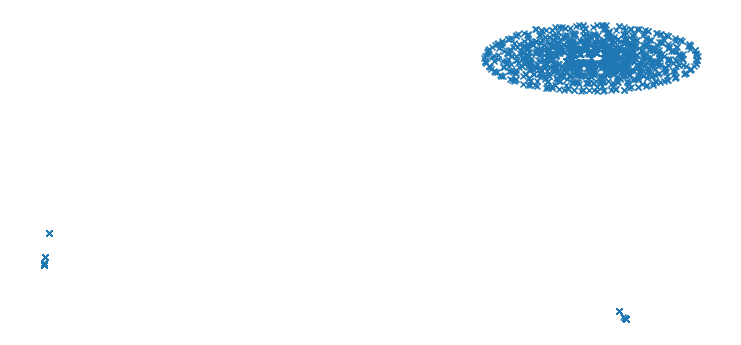

In [14]:
# get the tfidf scores and make them array to show in t-sne algorithm
%pylab inline

A_list =[]
for i in range(len(list_key_value)):
    A_list.append(list_key_value[i][1])

A_list = np.array(A_list)

tsne = TSNE()
Z = tsne.fit_transform(A_list.reshape(-1, 1))

fig = figure(figsize=(10, 5))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(Z[:, 0], Z[:, 1], marker="x")

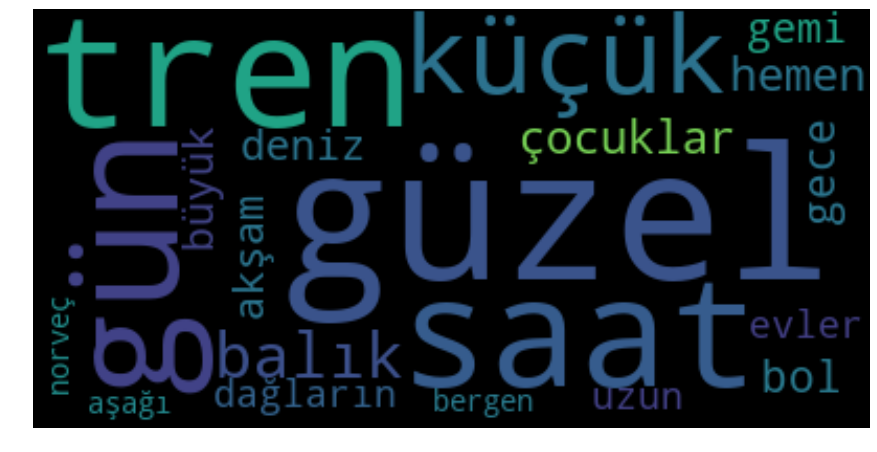

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

dic = {}
for i in range(len(res20)):
    dic[res20[i][0]] = res20[i][1]

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=dic)
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Data Sources :
### http://www.hurriyet.com.tr/seyahat/yazarlar/mehmet-yasin/mavi-cennette-yolculuk-40866893
### https://oznursakrak.wordpress.com/category/avrupa/norvec/

### Stopword Source :
### https://github.com/ahmetax/trstop

### Thanks

### Hincal Topcuoglu